# Series Finder  

## Find ordered samples based on real-valued variables in the metadata

__Import dependencies and load data__

In [1]:
import json
import pandas as pd
from utils import *

__1. Do you have a set of samples that you would like to restrict the retrieval to?__ 

These may be SRA samples that you have preprocessed and/or have access to expressiond data. 

In [2]:
available_data_f = None  ## <-- INPUT HERE

r = load_metadata(available_data_f)
sample_to_terms = r[0]
term_name_to_id = r[1]
sample_to_type = r[2]
sample_to_study = r[3]
sample_to_runs = r[4]
sample_to_real_val = r[5]

__2. Enter your query__  

Enter your target term in place of `'brain'`, your target property in place of `'age'`, and your target unit in place of `None`.

(Note: most samples in the SRA do not have unit information. If the search does not return many results, we suggest leaving this as `None` as the metadata is poorly labelled for units.

In [3]:
term = 'brain' ## <-- INPUT HERE
target_property = 'age' ## <-- INPUT HERE
UNIT = 'year' ## <-- INPUT HERE

__3. Filtering parameters__  

In [4]:
FILTER_DISEASE = True                           ## <-- INPUT HERE
FILTER_CELL_LINE = False                        ## <-- INPUT HERE
FILTER_IN_VITRO_DIFFERENTIATED_CELLS = True     ## <-- INPUT HERE 

__4. Search for ordered samples__

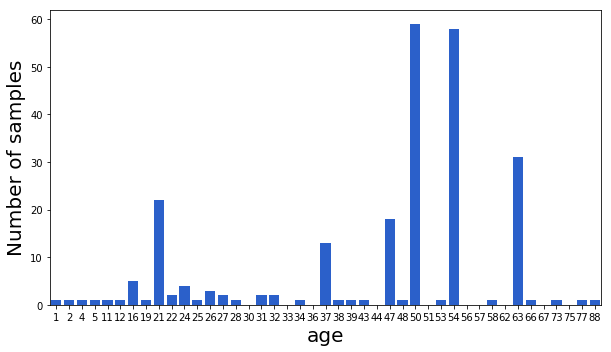

In [5]:
SAVE_FIGURE = 'brain_series.png' ## <-- INPUT

val_to_samples, primary_df = series(term, target_property, sample_to_real_val, sample_to_terms,             
        sample_to_type, sample_to_study, term_name_to_id, filter_disease=FILTER_DISEASE, 
        filter_poor=False, filter_cell_line=FILTER_CELL_LINE, 
        filter_differentiated=FILTER_IN_VITRO_DIFFERENTIATED_CELLS,
        value_limit=100, target_unit=UNIT)
create_series_plots(val_to_samples, target_property)
if SAVE_FIGURE is not None:
    plt.savefig(SAVE_FIGURE, format='png', dpi=150)
plt.show()

__5. Browse other metadata terms that are associated with samples in a given time point__

Enter whether you want to view cases or controls. Assign the following variable to the number corresponding to the timepoint you would like to view:

Displaying data for 31 sample with propert=63


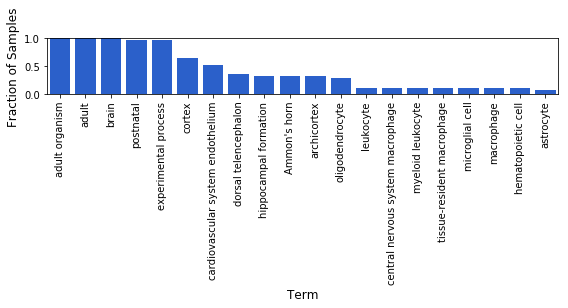

In [6]:
VALUE = 63                                 ## <-- INPUT HERE
SAVE_FIGURE = 'brain_series_co_terms.png'  ## <-- INPUT HERE

create_barplot_most_common_coterms_series(val_to_samples, VALUE, sample_to_terms)
if SAVE_FIGURE is not None:
    plt.savefig(SAVE_FIGURE, format='png', dpi=150)
plt.show()

Displaying most frequent co-occuring terms for 31 sample with property = 63


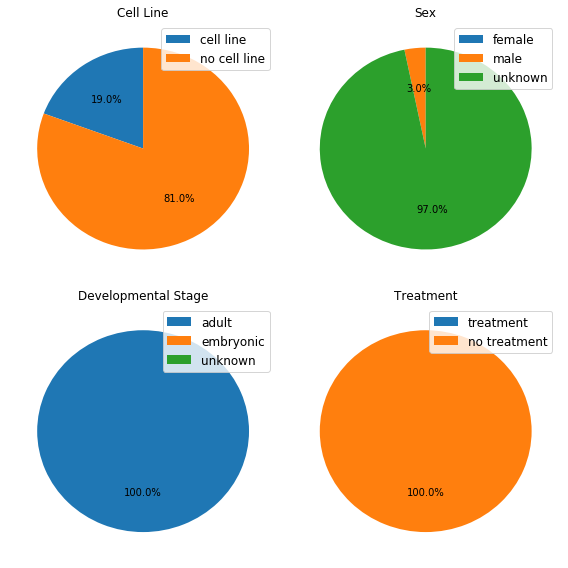

In [7]:
SAVE_FIGURE = 'brain_series_pie.png' ## <-- INPUT HERE

create_pie_charts_series(primary_df, val_to_samples, VALUE, sample_to_terms)
if SAVE_FIGURE is not None:
    plt.savefig(SAVE_FIGURE, format='png', dpi=150)
plt.show()

__6. Produce output file__. 

Enter the filename for which you would like to output these samples:

In [8]:
SAVE_FILE = 'series_data.tsv' ## <- OUTPUT FILE HERE

primary_df.to_csv(SAVE_FILE, sep='\t')